In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1

Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [ ]:
df = pd.read_csv("auto-mpg.csv")
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Question 2

Find completely unique/orthogonal car to toyota corona mark ii

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("auto-mpg.csv")

# Clean data
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert to numeric
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model year', 'origin']
df[numeric_cols] = df[numeric_cols].astype(float)

# Feature matrix (NO standardization)
X = df[numeric_cols].values

# Target car
target_car = "toyota corona mark ii"
target_index = df[df['car name'] == target_car].index[0]

# Cosine similarity
cos_sim = cosine_similarity(X)

# Ignore self similarity
cos_sim[target_index, target_index] = 1

# Find most orthogonal car
most_orthogonal_index = np.argmin(cos_sim[target_index])

# Print the car name
print(df.iloc[most_orthogonal_index]['car name'])

buick estate wagon (sw)


Question 3

Project the data to a 2-dimentional space and visualize using scatter plot

In [ ]:
import pandas as pd
import numpy as np

# 1. Load dataset
df = pd.read_csv("auto-mpg.csv")

# 2. Remove missing horsepower values
df = df[df["horsepower"] != "?"]
df["horsepower"] = df["horsepower"].astype(float)

# 3. Select numeric features
features = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model year",
    "origin"
]

X = df[features]

# 4. Find Toyota Corona Mark II index
target_index = df[df["car name"].str.lower() == "toyota corona mark ii"].index[0]

target_values = X.loc[target_index].values

# 5. Calculate Mean Squared Error
mse_list = []

for i in range(len(X)):
    car_values = X.iloc[i].values
    mse = np.mean((car_values - target_values) ** 2)
    mse_list.append(mse)

# 6. Add MSE values to dataframe
df["mse"] = mse_list

# 7. Sort and get top 5 similar cars (excluding itself)
top_5 = df[df.index != target_index] \
            .sort_values(by="mse", ascending=True) \
            .head(5)

# 8. Display result
print("Top 5 cars similar to Toyota Corona Mark II (using MSE):\n")
print(top_5[["car name", "mse"]])


Top 5 cars similar to Toyota Corona Mark II (using MSE):

                      car name        mse
110                 datsun 610   11.28125
22                    saab 99e   12.28125
150                     subaru   51.28125
80             ford pinto (sw)   88.00000
369  chevrolet cavalier 2-door  104.50000


Question 4

Write a function that returns dot product of two list of numbers

Explained variance ratio: [0.64659297 0.13338957]


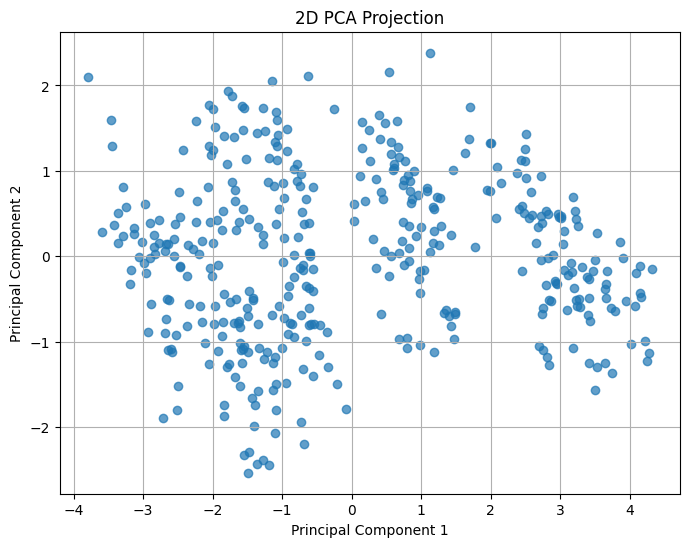

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load CSV (replace filename if needed)
df = pd.read_csv("auto-mpg.csv")

# Select only numeric columns
X = df.select_dtypes(include=[np.number])

# Handle missing values (drop rows with NaN)
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.grid(True)
plt.show()


Question 5

Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [ ]:
def dot_product(a, b):
    if len(a) != len(b):
        raise ValueError("Lists must have the same length")
    return sum(x * y for x, y in zip(a, b))

# Call the function
result = dot_product([1, 2, 3], [4, 5, 6])

# Print the result
print(result)



32


Question 6

Create a class Vector that supports addition, dot product, and magnitude.

In [ ]:
import math

class Vector:
    def __init__(self, values):
        self.values = values

    def __add__(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Vectors must have the same dimension")
        return Vector([a + b for a, b in zip(self.values, other.values)])

    def dot(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Vectors must have the same dimension")
        return sum(a * b for a, b in zip(self.values, other.values))

    def magnitude(self):
        return math.sqrt(sum(x ** 2 for x in self.values))

    def __repr__(self):
        return f"Vector({self.values})"


# ----------- Example usage (this produces output) -----------

v1 = Vector([1, 2, 3])
v2 = Vector([4, 5, 6])

print("v1 =", v1)
print("v2 =", v2)
print("v1 + v2 =", v1 + v2)
print("v1 · v2 =", v1.dot(v2))
print("|v1| =", v1.magnitude())


v1 = Vector([1, 2, 3])
v2 = Vector([4, 5, 6])
v1 + v2 = Vector([5, 7, 9])
v1 · v2 = 32
|v1| = 3.7416573867739413


Question 7

Write a function that returns the L1 and L2 norms of a vector given as list

In [ ]:
import math

def vector_norms(v):
    if not v:
        raise ValueError("Vector must not be empty")

    l1 = sum(abs(x) for x in v)
    l2 = math.sqrt(sum(x ** 2 for x in v))

    return l1, l2


# ----------- Example usage (this produces output) -----------

vector = [3, -4, 12]

l1_norm, l2_norm = vector_norms(vector)

print("Vector:", vector)
print("L1 norm:", l1_norm)
print("L2 norm:", l2_norm)


Vector: [3, -4, 12]
L1 norm: 19
L2 norm: 13.0
